In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
#importing the essential libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import itertools
################
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import loadtxt
import tensorflow.keras
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing.image import *
%matplotlib inline
from tensorflow import keras
from keras import *
import keras
import cv2
import shutil
import os
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras import regularizers
from keras.regularizers import l2
from sklearn.metrics import f1_score, precision_score, recall_score

In [31]:
# TRAIN :
path1='/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/0_normal'
path2='/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/1_ulcerative_colitis'
path3='/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/2_polyps'
path4='/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/3_esophagitis'
files1=os.listdir(path1)
files2=os.listdir(path2)
files3=os.listdir(path3)
files4=os.listdir(path4)
num_files1=len(files1)
num_files2=len(files2)
num_files3=len(files3)
num_files4=len(files4)
print('0_normal :  ',num_files1)
print('1_ulcerative_colitis :  ',num_files2)
print('2_polyps :  ',num_files3)
print('3_esophagitis :  ',num_files4)

0_normal :   1600
1_ulcerative_colitis :   1600
2_polyps :   1600
3_esophagitis :   1600


In [3]:
!mkdir /content/drive/MyDrive/kaggledata/CutOut
!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.2
!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.3
!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.4

!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/0_normal
!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/1_ulcerative_colitis
!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/2_polyps
!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/3_esophagitis

!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.3/0_normal
!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.3/1_ulcerative_colitis
!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.3/2_polyps
!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.3/3_esophagitis

!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.4/0_normal
!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.4/1_ulcerative_colitis
!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.4/2_polyps
!mkdir /content/drive/MyDrive/kaggledata/CutOut/train_a=0.4/3_esophagitis

In [11]:
source_dir = "/content/drive/MyDrive/kaggledata/Raw_colon/train/3_esophagitis"
destination_dir = "/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/3_esophagitis"

files = os.listdir(source_dir)

for file_name in files:
    source_file = os.path.join(source_dir, file_name)
    destination_file = os.path.join(destination_dir, file_name)
    shutil.copy(source_file, destination_file)

print("All files have been copied successfully.")
##################################################################
source_dir = "/content/drive/MyDrive/kaggledata/Raw_colon/train/2_polyps"
destination_dir = "/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/2_polyps"

files = os.listdir(source_dir)

for file_name in files:
    source_file = os.path.join(source_dir, file_name)
    destination_file = os.path.join(destination_dir, file_name)
    shutil.copy(source_file, destination_file)

print("All files have been copied successfully.")
##################################################################
source_dir = "/content/drive/MyDrive/kaggledata/Raw_colon/train/1_ulcerative_colitis"
destination_dir = "/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/1_ulcerative_colitis"

files = os.listdir(source_dir)

for file_name in files:
    source_file = os.path.join(source_dir, file_name)
    destination_file = os.path.join(destination_dir, file_name)
    shutil.copy(source_file, destination_file)

print("All files have been copied successfully.")
##################################################################
source_dir = "/content/drive/MyDrive/kaggledata/Raw_colon/train/0_normal"
destination_dir = "/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/0_normal"

files = os.listdir(source_dir)

for file_name in files:
    source_file = os.path.join(source_dir, file_name)
    destination_file = os.path.join(destination_dir, file_name)
    shutil.copy(source_file, destination_file)

print("All files have been copied successfully.")

All files have been copied successfully.
All files have been copied successfully.
All files have been copied successfully.
All files have been copied successfully.


#cutout_a=0.2

In [15]:
def cutout(image, alpha):

        height, width, _ = image.shape
        mask_size = int(height * alpha)
        # Select a random position for the cutout mask
        top = random.randint(0, height - mask_size)
        left = random.randint(0, width - mask_size)

        # Create a black mask with the same size as the image
        mask = np.ones((height, width, 3), dtype=np.float32)

        # Set the pixels within the cutout mask to zero
        mask[top:top+mask_size, left:left+mask_size, :] = 0

        # Apply the cutout mask to the image
        augmented_image = image * mask

        return augmented_image


dataset_path = '/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/0_normal'

images = os.listdir(dataset_path)
alpha=0.2

for i in range(0, len(images), 1):
    image = cv2.imread(os.path.join(dataset_path, images[i]))
    # Cutout augmentation
    new_image = cutout(image, alpha)
    # save the new image
    cv2.imwrite(os.path.join(dataset_path, f'cutout_{i}.jpg'), new_image)
##############################################################################

dataset_path = '/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/1_ulcerative_colitis'
images = os.listdir(dataset_path)
alpha=0.2

for i in range(0, len(images), 1):
    image = cv2.imread(os.path.join(dataset_path, images[i]))
    
    new_image = cutout(image, alpha)
    
    cv2.imwrite(os.path.join(dataset_path, f'cutout_{i}.jpg'), new_image)
##############################################################################

dataset_path = '/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/2_polyps'

images = os.listdir(dataset_path)
alpha=0.2

for i in range(0, len(images), 1):
    image = cv2.imread(os.path.join(dataset_path, images[i]))
  
    new_image = cutout(image, alpha)
   
    cv2.imwrite(os.path.join(dataset_path, f'cutout_{i}.jpg'), new_image)
##############################################################################

dataset_path = '/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/3_esophagitis'

images = os.listdir(dataset_path)
alpha=0.2

for i in range(0, len(images), 1):
    image = cv2.imread(os.path.join(dataset_path, images[i]))
    new_image = cutout(image, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutout_{i}.jpg'), new_image)

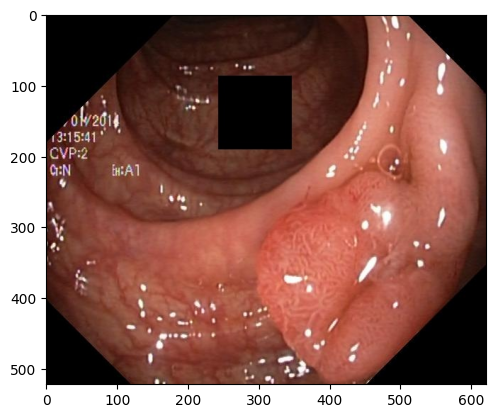

In [18]:
img = image.load_img('/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2/2_polyps/cutout_240.jpg')
plt.imshow(img)

In [34]:
train_set='/content/drive/MyDrive/kaggledata/CutOut/train_a=0.2'
val_set='/content/drive/MyDrive/kaggledata/Raw_colon/val'
test_set='/content/drive/MyDrive/kaggledata/Raw_colon/test'

train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

# image addressing
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')

Found 6400 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [35]:
base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model18 = Sequential()
model18.add(base_model)
model18.add(GaussianNoise(0.35))
model18.add(GlobalAveragePooling2D())
model18.add(Dense(256,activation='relu'))
model18.add(BatchNormalization())
model18.add(GaussianNoise(0.35))
model18.add(Dropout(0.2))
model18.add(Dense(4, activation='softmax'))
model18.summary()

model18.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

checkpoint = ModelCheckpoint("model18.best.keras",monitor="val_accuracy",save_weights_only=True,mode="max",save_best_only=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 20, min_delta = 0.001,
                              mode='auto',verbose=1)
callbacks2=[checkpoint,reduce_lr]

history18 = model18.fit(
    train_generator,
    steps_per_epoch=60,
    epochs = 50,
    validation_data = validation_generator,
    callbacks=callbacks2,
)

# Save history
import pickle

with open('training_history18.pkl', 'wb') as file:
    pickle.dump(history18.history, file)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 7, 7, 1408)        7768569   
 )                                                               
                                                                 
 gaussian_noise_2 (Gaussian  (None, 7, 7, 1408)        0         
 Noise)                                                          
                                                                 
 global_average_pooling2d_1  (None, 1408)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               360704    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                     

In [41]:
model18.load_weights('model18.best.keras')
model18.evaluate(test_generator)
#loss: 0.1205 - accuracy: 0.9525 - precision: 0.9548 - recall: 0.9513 - auc: 0.9961
#loss: 0.1227 - accuracy: 0.9575 - precision: 0.9598 - recall: 0.9563 - auc: 0.9961
#loss: 0.1222 - accuracy: 0.9538 - precision: 0.9548 - recall: 0.9513 - auc: 0.9966
#acc_avg :0.9546
model18.evaluate(validation_generator)
#loss: 0.1465 - accuracy: 0.9445 - precision: 0.9483 - recall: 0.9440 - auc: 0.9950
#loss: 0.1400 - accuracy: 0.9510 - precision: 0.9528 - recall: 0.9495 - auc: 0.9957
#loss: 0.1340 - accuracy: 0.9550 - precision: 0.9574 - recall: 0.9540 - auc: 0.9950
#acc_avg :0.9501

125/125 [==============================] - 47s 376ms/step - loss: 0.1340 - accuracy: 0.9550 - precision: 0.9574 - recall: 0.9540 - auc: 0.9950


[0.13404738903045654,
 0.9549999833106995,
 0.9573507308959961,
 0.9539999961853027,
 0.9950026273727417]

<ipython-input-37-2d82c1b9113c>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = np.argmax(model18.predict_generator(test_generator), axis=1)


F1 Score for all classes: 0.9545395333688615
Precision for all classes: 0.9549579945449278
Recall for all classes: 0.955
Confusion Matrix : 
 [[200   0   0   0]
 [  2 187   9   2]
 [  7  16 177   0]
 [  0   0   0 200]]


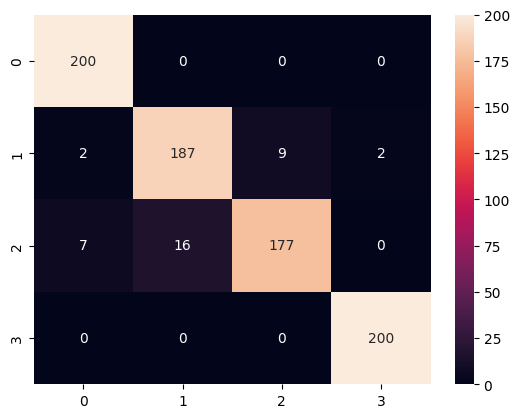

In [37]:
model18.load_weights('model18.best.keras')
Y_pred = np.argmax(model18.predict_generator(test_generator), axis=1)
Y_test = test_generator.classes
X_test= test_generator

f1 = f1_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
print("F1 Score for all classes:", f1)
print("Precision for all classes:", precision)
print("Recall for all classes:", recall)

cm1 = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm1)
cm = sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True,fmt="d")

#cutout_a=0.3

In [19]:
def cutout(image, alpha):

        height, width, _ = image.shape
        mask_size = int(height * alpha)
        # Select a random position for the cutout mask
        top = random.randint(0, height - mask_size)
        left = random.randint(0, width - mask_size)

        # Create a black mask with the same size as the image
        mask = np.ones((height, width, 3), dtype=np.float32)

        # Set the pixels within the cutout mask to zero
        mask[top:top+mask_size, left:left+mask_size, :] = 0

        # Apply the cutout mask to the image
        augmented_image = image * mask

        return augmented_image


dataset_path = '/content/drive/MyDrive/kaggledata/CutOut/train_a=0.3/0_normal'
images = os.listdir(dataset_path)
alpha=0.3

for i in range(0, len(images), 1):
    image = cv2.imread(os.path.join(dataset_path, images[i]))

    new_image = cutout(image, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutout_{i}.jpg'), new_image)
##############################################################################

dataset_path = '/content/drive/MyDrive/kaggledata/CutOut/train_a=0.3/1_ulcerative_colitis'
images = os.listdir(dataset_path)
alpha=0.3

for i in range(0, len(images), 1):
    image = cv2.imread(os.path.join(dataset_path, images[i]))

    new_image = cutout(image, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutout_{i}.jpg'), new_image)
##############################################################################

dataset_path = '/content/drive/MyDrive/kaggledata/CutOut/train_a=0.3/2_polyps'
images = os.listdir(dataset_path)
alpha=0.3

for i in range(0, len(images), 1):
    image = cv2.imread(os.path.join(dataset_path, images[i]))

    new_image = cutout(image, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutout_{i}.jpg'), new_image)
##############################################################################

dataset_path = '/content/drive/MyDrive/kaggledata/CutOut/train_a=0.3/3_esophagitis'
images = os.listdir(dataset_path)
alpha=0.3

for i in range(0, len(images), 1):
    image = cv2.imread(os.path.join(dataset_path, images[i]))
    new_image = cutout(image, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutout_{i}.jpg'), new_image)

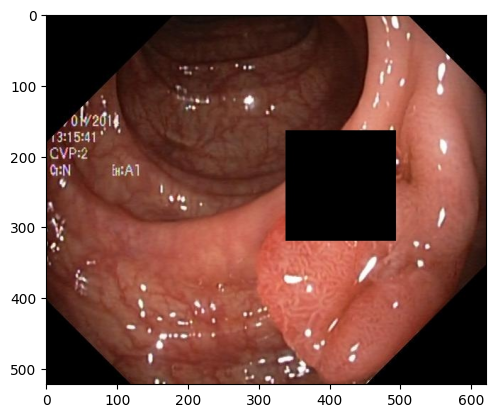

In [22]:
img = image.load_img('/content/drive/MyDrive/kaggledata/CutOut/train_a=0.3/2_polyps/cutout_240.jpg')
plt.imshow(img)

In [42]:
train_set='/content/drive/MyDrive/kaggledata/CutOut/train_a=0.3'
val_set='/content/drive/MyDrive/kaggledata/Raw_colon/val'
test_set='/content/drive/MyDrive/kaggledata/Raw_colon/test'

train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

# image addressing
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')

Found 6400 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [43]:
base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model19 = Sequential()
model19.add(base_model)
model19.add(GaussianNoise(0.35))
model19.add(GlobalAveragePooling2D())
model19.add(Dense(256,activation='relu'))
model19.add(BatchNormalization())
model19.add(GaussianNoise(0.35))
model19.add(Dropout(0.2))
model19.add(Dense(4, activation='softmax'))
model19.summary()

model19.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

checkpoint = ModelCheckpoint("model19.best.keras",monitor="val_accuracy",save_weights_only=True,mode="max",save_best_only=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 20, min_delta = 0.001,
                              mode='auto',verbose=1)
callbacks2=[checkpoint,reduce_lr]

history19 = model19.fit(
    train_generator,
    steps_per_epoch=60,
    epochs = 50,
    validation_data = validation_generator,
    callbacks=callbacks2,
)

# Save history
import pickle

with open('training_history19.pkl', 'wb') as file:
    pickle.dump(history19.history, file)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 7, 7, 1408)        7768569   
 )                                                               
                                                                 
 gaussian_noise_4 (Gaussian  (None, 7, 7, 1408)        0         
 Noise)                                                          
                                                                 
 global_average_pooling2d_2  (None, 1408)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 256)               360704    
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                     

In [48]:
model19.load_weights('model19.best.keras')
model19.evaluate(test_generator)
#loss: 0.1155 - accuracy: 0.9575 - precision: 0.9574 - recall: 0.9563 - auc: 0.9968
#loss: 0.1137 - accuracy: 0.9550 - precision: 0.9585 - recall: 0.9538 - auc: 0.9968
#loss: 0.1156 - accuracy: 0.9563 - precision: 0.9586 - recall: 0.9563 - auc: 0.9956
#acc_avg :0.9562
model19.evaluate(validation_generator)
#loss: 0.1363 - accuracy: 0.9515 - precision: 0.9548 - recall: 0.9505 - auc: 0.9952
#loss: 0.1438 - accuracy: 0.9470 - precision: 0.9508 - recall: 0.9460 - auc: 0.9948
#loss: 0.1514 - accuracy: 0.9485 - precision: 0.9498 - recall: 0.9460 - auc: 0.9947
#acc_avg :0.9490

125/125 [==============================] - 51s 409ms/step - loss: 0.1514 - accuracy: 0.9485 - precision: 0.9498 - recall: 0.9460 - auc: 0.9947


[0.15142998099327087,
 0.9484999775886536,
 0.9497991800308228,
 0.9459999799728394,
 0.9947444796562195]

<ipython-input-45-53a3d456d678>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = np.argmax(model19.predict_generator(test_generator), axis=1)


F1 Score for all classes: 0.9534173979056463
Precision for all classes: 0.9532570283294747
Recall for all classes: 0.95375
Confusion Matrix : 
 [[200   0   0   0]
 [  3 180  15   2]
 [  2  15 183   0]
 [  0   0   0 200]]


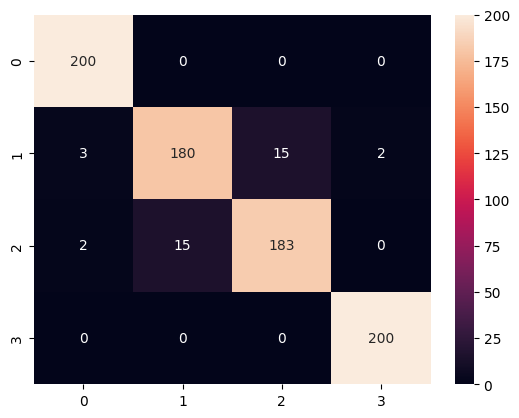

In [45]:
model19.load_weights('model19.best.keras')
Y_pred = np.argmax(model19.predict_generator(test_generator), axis=1)
Y_test = test_generator.classes
X_test= test_generator

f1 = f1_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
print("F1 Score for all classes:", f1)
print("Precision for all classes:", precision)
print("Recall for all classes:", recall)

cm1 = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm1)
cm = sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True,fmt="d")

#cutmix_a=0.4

In [23]:
def cutout(image, alpha):

        height, width, _ = image.shape
        mask_size = int(height * alpha)
        # Select a random position for the cutout mask
        top = random.randint(0, height - mask_size)
        left = random.randint(0, width - mask_size)

        # Create a black mask with the same size as the image
        mask = np.ones((height, width, 3), dtype=np.float32)

        # Set the pixels within the cutout mask to zero
        mask[top:top+mask_size, left:left+mask_size, :] = 0

        # Apply the cutout mask to the image
        augmented_image = image * mask

        return augmented_image


dataset_path = '/content/drive/MyDrive/kaggledata/CutOut/train_a=0.4/0_normal'
images = os.listdir(dataset_path)
alpha=0.4

for i in range(0, len(images), 1):
    image = cv2.imread(os.path.join(dataset_path, images[i]))

    new_image = cutout(image, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutout_{i}.jpg'), new_image)
##############################################################################

dataset_path = '/content/drive/MyDrive/kaggledata/CutOut/train_a=0.4/1_ulcerative_colitis'
images = os.listdir(dataset_path)
alpha=0.4

for i in range(0, len(images), 1):
    image = cv2.imread(os.path.join(dataset_path, images[i]))
    
    new_image = cutout(image, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutout_{i}.jpg'), new_image)
##############################################################################

dataset_path = '/content/drive/MyDrive/kaggledata/CutOut/train_a=0.4/2_polyps'
images = os.listdir(dataset_path)
alpha=0.4

for i in range(0, len(images), 1):
    image = cv2.imread(os.path.join(dataset_path, images[i]))

    new_image = cutout(image, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutout_{i}.jpg'), new_image)
##############################################################################

dataset_path = '/content/drive/MyDrive/kaggledata/CutOut/train_a=0.4/3_esophagitis'

images = os.listdir(dataset_path)
alpha=0.4

for i in range(0, len(images), 1):
    image = cv2.imread(os.path.join(dataset_path, images[i]))

    new_image = cutout(image, alpha)
    cv2.imwrite(os.path.join(dataset_path, f'cutout_{i}.jpg'), new_image)

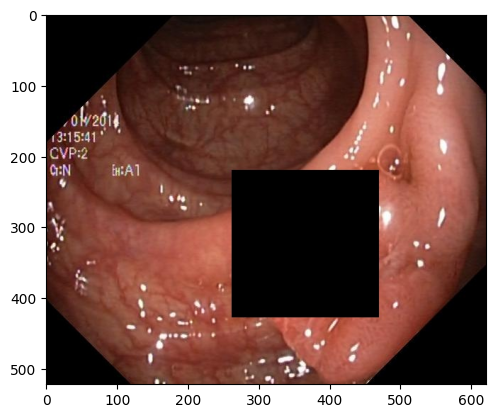

In [26]:
img = image.load_img('/content/drive/MyDrive/kaggledata/CutOut/train_a=0.4/2_polyps/cutout_240.jpg')
plt.imshow(img)

In [27]:
train_set='/content/drive/MyDrive/kaggledata/CutOut/train_a=0.4'
val_set='/content/drive/MyDrive/kaggledata/Raw_colon/val'
test_set='/content/drive/MyDrive/kaggledata/Raw_colon/test'

train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

# image addressing
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')

Found 6400 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [28]:
base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model20 = Sequential()
model20.add(base_model)
model20.add(GaussianNoise(0.35))
model20.add(GlobalAveragePooling2D())
model20.add(Dense(256,activation='relu'))
model20.add(BatchNormalization())
model20.add(GaussianNoise(0.35))
model20.add(Dropout(0.2))
model20.add(Dense(4, activation='softmax'))
model20.summary()

model20.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

checkpoint = ModelCheckpoint("model20.best.keras",monitor="val_accuracy",save_weights_only=True,mode="max",save_best_only=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 20, min_delta = 0.001,
                              mode='auto',verbose=1)
callbacks2=[checkpoint,reduce_lr]

history20 = model20.fit(
    train_generator,
    steps_per_epoch=60,
    epochs = 50,
    validation_data = validation_generator,
    callbacks=callbacks2,
)

# Save history
import pickle

with open('training_history20.pkl', 'wb') as file:
    pickle.dump(history20.history, file)

31790344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 7, 7, 1408)        7768569   
 )                                                               
                                                                 
 gaussian_noise (GaussianNo  (None, 7, 7, 1408)        0         
 ise)                                                            
                                                                 
 global_average_pooling2d (  (None, 1408)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 batch_normalization (Batch  (None, 256)               10

In [49]:
model20.load_weights('model20.best.keras')
model20.evaluate(test_generator)
#loss: 0.1139 - accuracy: 0.9588 - precision: 0.9611 - recall: 0.9575 - auc: 0.9969
#loss: 0.1056 - accuracy: 0.9575 - precision: 0.9586 - recall: 0.9550 - auc: 0.9972
#loss: 0.1281 - accuracy: 0.9550 - precision: 0.9560 - recall: 0.9513 - auc: 0.9963
#acc_avg :0.9571
model20.evaluate(validation_generator)
#loss: 0.1333 - accuracy: 0.9525 - precision: 0.9543 - recall: 0.9505 - auc: 0.9953
#loss: 0.1228 - accuracy: 0.9555 - precision: 0.9564 - recall: 0.9540 - auc: 0.9963
#loss: 0.1311 - accuracy: 0.9570 - precision: 0.9598 - recall: 0.9540 - auc: 0.9959
#acc_avg :0.9550

125/125 [==============================] - 47s 377ms/step - loss: 0.1311 - accuracy: 0.9570 - precision: 0.9598 - recall: 0.9540 - auc: 0.9959


[0.1310996264219284,
 0.9570000171661377,
 0.9597585797309875,
 0.9539999961853027,
 0.9959396123886108]

<ipython-input-30-748efd974f5f>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = np.argmax(model20.predict_generator(test_generator), axis=1)


F1 Score for all classes: 0.9547424130372493
Precision for all classes: 0.9548523367902103
Recall for all classes: 0.955
Confusion Matrix : 
 [[200   0   0   0]
 [  2 186   8   4]
 [  4  15 181   0]
 [  0   1   2 197]]


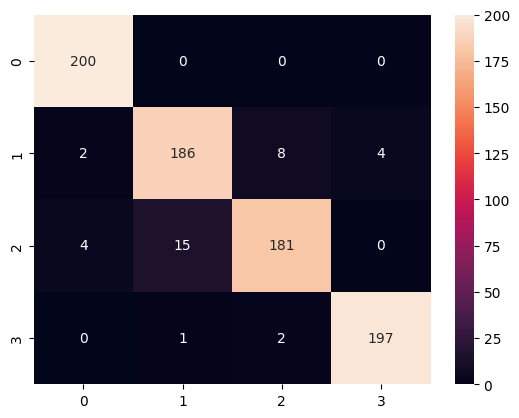

In [30]:
model20.load_weights('model20.best.keras')
Y_pred = np.argmax(model20.predict_generator(test_generator), axis=1)
Y_test = test_generator.classes
X_test= test_generator

f1 = f1_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
print("F1 Score for all classes:", f1)
print("Precision for all classes:", precision)
print("Recall for all classes:", recall)

cm1 = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm1)
cm = sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True,fmt="d")

#=>so the best alpha for cutout is :0.4